# 1. Data Preparation & Cleaning

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
%matplotlib inline

In [1091]:
#read in data
metrics_by_country = pd.read_csv(r'C:\Users\jorda\OneDrive\Desktop\Python\Projects\ken_jee_youtube_data\data\Metrics_By_Country_And_Subscriber_Status.csv')
metrics_by_video = pd.read_csv(r'C:\Users\jorda\OneDrive\Desktop\Python\Projects\ken_jee_youtube_data\data\Metrics_By_Video.csv')
video_comments = pd.read_csv(r'C:\Users\jorda\OneDrive\Desktop\Python\Projects\ken_jee_youtube_data\data\Video_Comments.csv')
video_performance_over_time = pd.read_csv(r'C:\Users\jorda\OneDrive\Desktop\Python\Projects\ken_jee_youtube_data\data\Video_Performance_Over_Time.csv')



In [1092]:
#remove all rows with null values
metrics_by_country = metrics_by_country.dropna()
metrics_by_video = metrics_by_video.dropna()
video_comments = video_comments.dropna()
video_performance_over_time = video_performance_over_time.dropna()

In [1093]:
#give video identifyer single name accross all data files - 'Vedio Id'
video_comments = video_comments.rename(columns={'VidId':'Video_Id'})
metrics_by_country = metrics_by_country.rename(columns={'External Video ID':'Video_Id'})
metrics_by_video =  metrics_by_video.rename(columns={'Video':'Video_Id'})
video_performance_over_time = video_performance_over_time.rename(columns={'External Video ID':'Video_Id'})

In [1094]:
#set video publish time and average view time to datetime data type
metrics_by_video['Video pub­lish time'] =  pd.to_datetime(metrics_by_video['Video pub­lish time'])
metrics_by_video['Av­er­age view dur­a­tion'] =  pd.to_datetime(metrics_by_video['Av­er­age view dur­a­tion']).dt.strftime('%H:%M:%S')

#add day of the week column from when video was posted
metrics_by_video['Video publish day'] = metrics_by_video['Video pub­lish time'].dt.day_name()

# 2. Sentiment Analysis

In [1099]:
#remove stop words
stop = stopwords.words('english')
video_comments['comments_without_stopwords'] = video_comments['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [1100]:
#calculate the polarity of each comment on a scale from -1 to 1 with -1 being negative and 1 being positive. 
video_comments['polarity'] = video_comments['comments_without_stopwords'].apply(lambda x: TextBlob(x).sentiment.polarity).round(1)

# 3. Exploratory Data Analysis

### 3.1 - Analyzing Comment Sentiment

In [1101]:
#merging Video_Comments and Metrics_By_Video
video_comments_and_metrics = video_comments.merge(metrics_by_video, on='Video_Id', how='left')

In [1102]:
#calculate averge polarity for each video then merge it with 'video_comments_and_metrics'
video_avg_polarity = pd.DataFrame(video_comments_and_metrics.groupby(by=['Video_Id'])['polarity'].mean())
video_avg_polarity.reset_index(level=0, inplace=True)
video_avg_polarity =  video_avg_polarity.rename(columns={'polarity':'avg_polarity'})

metrics_by_video = metrics_by_video.merge(video_avg_polarity, on='Video_Id', how='left')

Plot 1

Text(0.5, 1.0, "Video Comment's Sentiment")

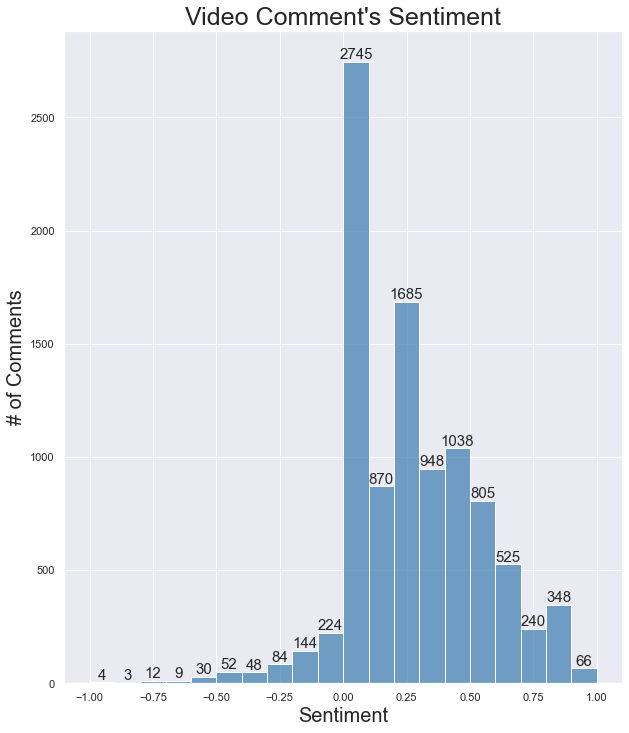

In [1156]:
#distribution of sentiment by comments
fig, ax = plt.subplots(figsize=(10,12))

plot1 = sns.histplot(video_comments['polarity'], binwidth=.1, ax=ax, color='steelblue')

plot1.bar_label(plot1.containers[0], fontsize=15)
plot1.set_xlabel('Sentiment', size=20)
plot1.set_ylabel('# of Comments', size=20) 
plot1.set_title('Video Comment' + "'"+ 's Sentiment', size=25)


Plot 2

Text(0.5, 1.0, 'Video Sentiment')

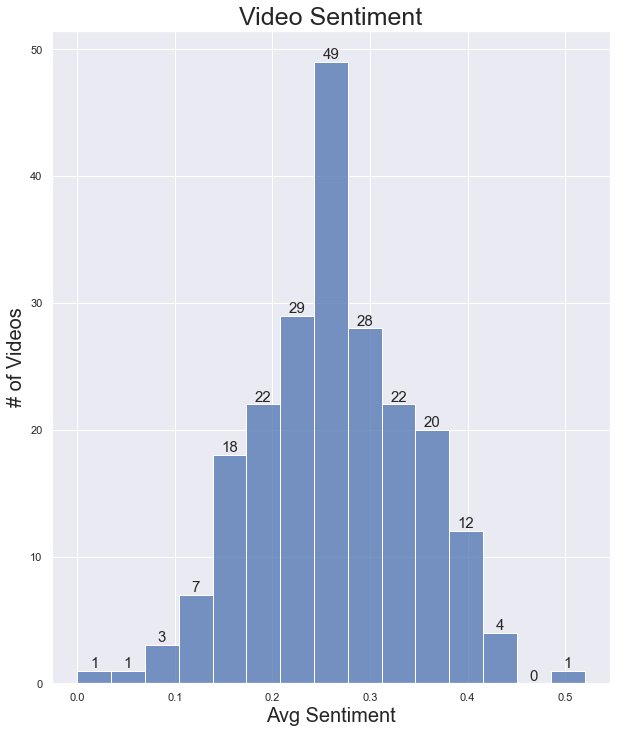

In [1154]:
#distribution of average sentiment by number of videos
fig, ax = plt.subplots(figsize=(10,12))

plot2 = sns.histplot(metrics_by_video['avg_polarity'], ax=ax)

plot2.bar_label(plot2.containers[0], fontsize=15)
plot2.set_xlabel('Avg Sentiment', size=20)
plot2.set_ylabel('# of Videos', size=20)
plot2.set_title('Video Sentiment', size=25)

#### Top 10 Videos with the Most Amount of High Sentiment Scores

Plot 3

Text(0.5, 1.0, 'Top 10 Videos with Most Amount of High Sentiment Comments')

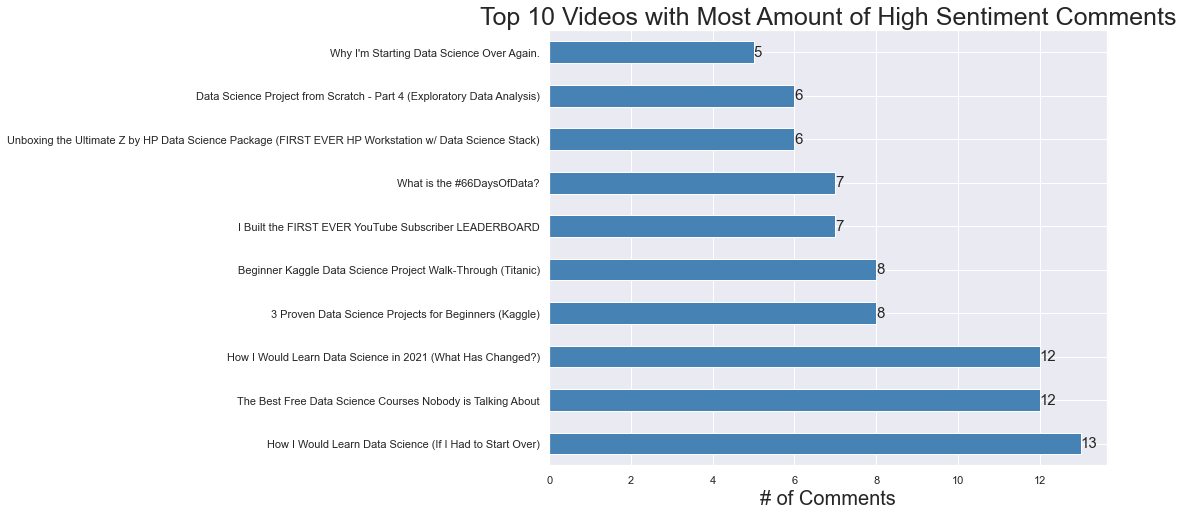

In [1169]:
plt.figure(figsize=(10,8))

plot3 = video_comments_and_metrics['Video title'].loc[video_comments_and_metrics['polarity'] == 1 ].value_counts().head(10).plot(kind='barh', color='steelblue')

plot3.bar_label(plot3.containers[0], fontsize=15)
plot3.set_xlabel('# of Comments', size=20)
plot3.set_title('Top 10 Videos w/ Most Amount of High Sentiment Comments', size=25)

#### Top 10 Videos with the Most Amount of Low Sentiment Scores

Plot 4

Text(0.5, 1.0, 'Top 10 Videos with Most Amount of Low Sentiment Comments')

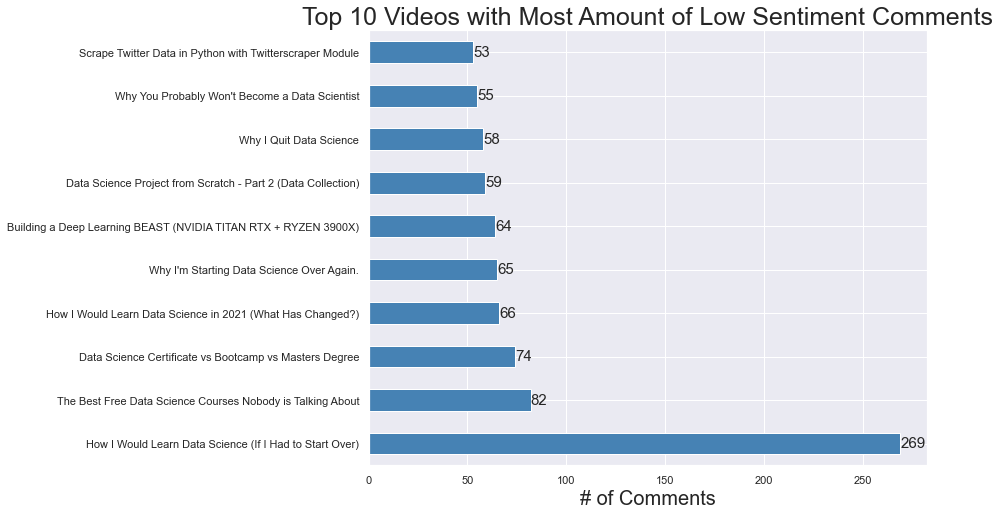

In [1179]:
plt.figure(figsize=(10,8))

plot4 = video_comments_and_metrics['Video title'].loc[video_comments_and_metrics['polarity'] == 0 ].value_counts().head(10).plot(kind='barh', color='steelblue')

plot4.bar_label(plot4.containers[0], fontsize=15)
plot4.set_xlabel('# of Comments', size=20)
plot4.set_title('Top 10 Videos w/ Most Amount of Low Sentiment Comments', size=25)

#### Top 10 Videos with Highest Average Sentiment Score

Plot 5

Text(0.5, 1.0, '-1 = Negative Seentiment       0 = Neutral     1 = Positive Sentiment')

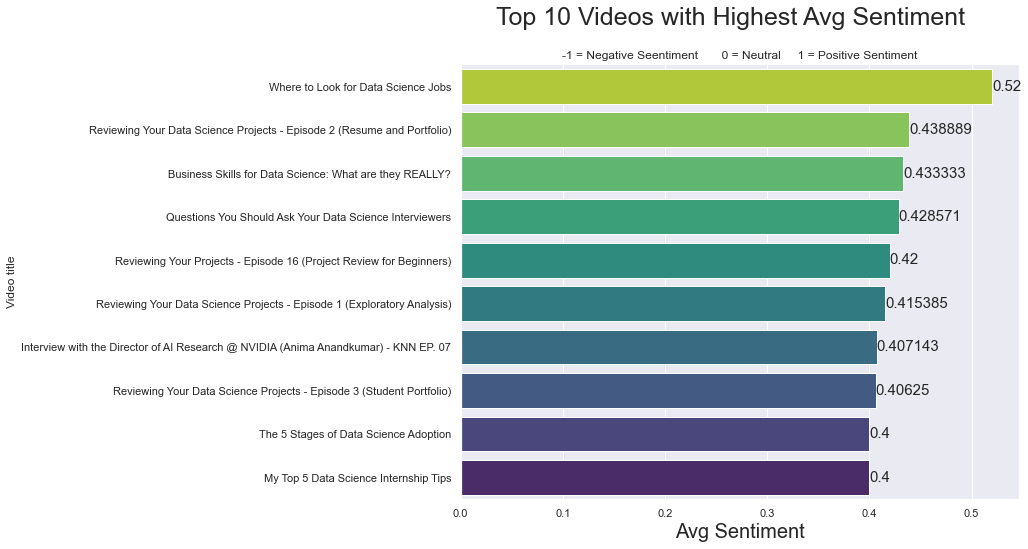

In [1185]:
top10_highest_sentiment_videos = pd.DataFrame(metrics_by_video[['Video title', 'avg_polarity']].loc[metrics_by_video['avg_polarity'] > .35].sort_values(by='avg_polarity', ascending=False).head(10))

fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Top 10 Videos w/ Highest Avg Sentiment', size=25)

plot5 = sns.barplot(data=top10_highest_sentiment_videos, x='avg_polarity', y='Video title', palette='viridis_r')

plot5.bar_label(plot5.containers[0], fontsize=15)
plot5.set_xlabel('Avg Sentiment', size=20)
plot5.set_title('-1 = Negative Seentiment       0 = Neutral     1 = Positive Sentiment', size=12)

#### Top 10 Videos with Lowest Average Sentiment Score

Plot 6

Text(0.5, 1.0, '-1 = Negative Seentiment       0 = Neutral     1 = Positive Sentiment')

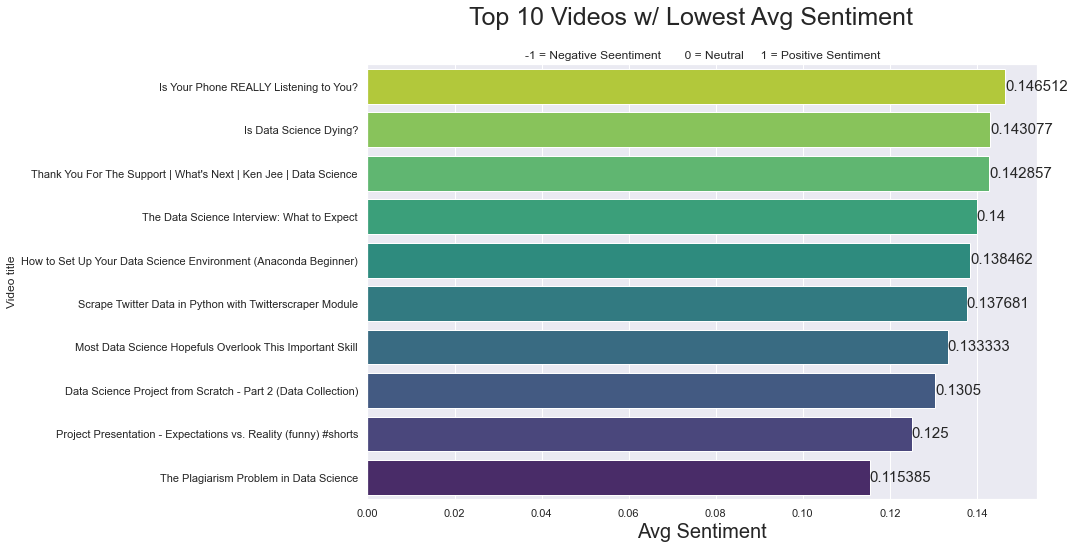

In [1191]:
top10_lowest_sentiment_videos = pd.DataFrame(metrics_by_video[['Video title', 'avg_polarity']].loc[metrics_by_video['avg_polarity'] < .15].sort_values(by='avg_polarity', ascending=False).head(10))

fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Top 10 Videos w/ Lowest Avg Sentiment', size=25)

plot6 = sns.barplot(data=top10_lowest_sentiment_videos, x='avg_polarity', y='Video title', palette='viridis_r')

plot6.bar_label(plot6.containers[0], fontsize=15)
plot6.set_xlabel('Avg Sentiment', size=20)
plot6.set_title('-1 = Negative Seentiment       0 = Neutral     1 = Positive Sentiment', size=12)


#### Sentiment Over Time

Plot 7

Text(0.5, 1.0, 'Purple = Avg of Bottom 10 Videos         Orange = Avg of Top 10 Videos         Red = Avg of All 221 Videos')

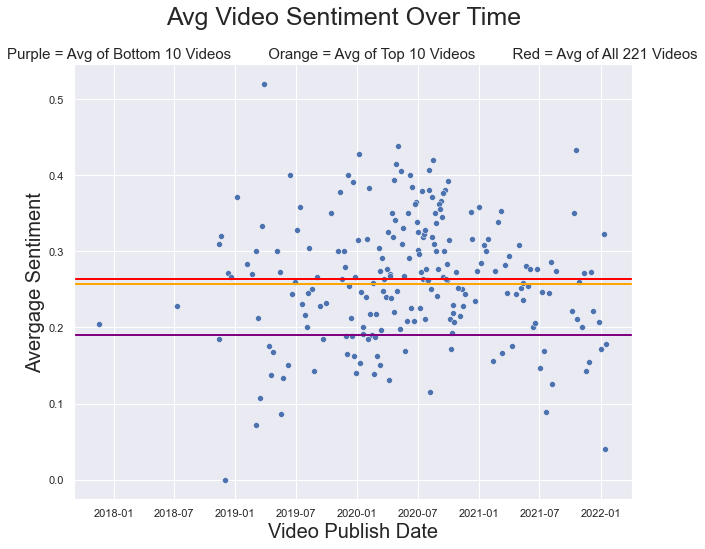

In [1204]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Avg Video Sentiment Over Time', size=25)

plot7 = sns.scatterplot(data=metrics_by_video, x='Video pub­lish time', y='avg_polarity', palette='viridis', ax=ax)

plot7.axhline(0.2637, linewidth=2, color='red')
plot7.axhline(0.2578, linewidth=2, color='orange')
plot7.axhline(0.1897, linewidth=2, color='purple')
plot7.set_xlabel('Video Publish Date', size=20)
plot7.set_ylabel('Avergage Sentiment', size=20)
plot7.set_title('Purple = Avg of Bottom 10 Videos         Orange = Avg of Top 10 Videos         Red = Avg of All 221 Videos', size=15)


#### Average Sentiment and Video Metrics

Plot 8-16

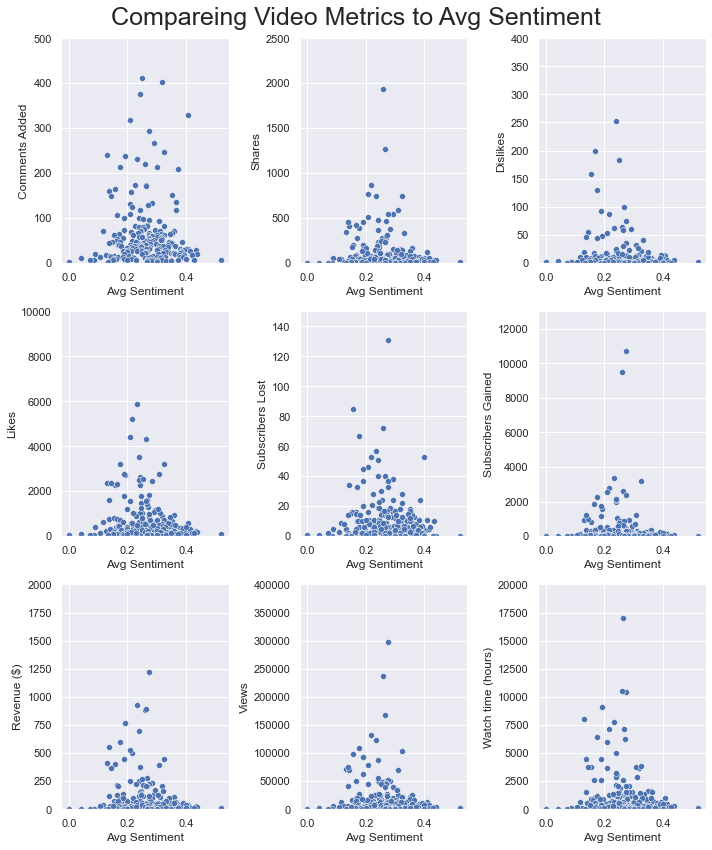

In [1222]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 12))
fig.suptitle('Compareing Video Metrics to Avg Sentiment', size=25)

plot8 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Com­ments ad­ded', ax=ax[0,0])
plot8.set(ylim=(0,500), xlabel='Avg Sentiment', ylabel='Comments Added')

plot9 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Shares', ax=ax[0,1])
plot9.set(ylim=(0,2500), xlabel='Avg Sentiment')

plot10 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Dis­likes', ax=ax[0,2])
plot10.set(ylim=(0, 400), ylabel='Dislikes' , xlabel='Avg Sentiment')

plot11 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Likes', ax=ax[1,0])
plot11.set(ylim=(0, 10000), xlabel='Avg Sentiment')

plot12 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Sub­scribers lost', ax=ax[1,1])
plot12.set(ylim=(0,150), ylabel='Subscribers Lost', xlabel='Avg Sentiment')

plot13 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Sub­scribers gained', ax=ax[1,2])
plot13.set(ylim=(0, 13000), ylabel='Subscribers Gained', xlabel='Avg Sentiment')

plot14 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Your es­tim­ated rev­en­ue (USD)', ax=ax[2,0])
plot14.set(ylim=(0, 2000), ylabel='Revenue ($)', xlabel='Avg Sentiment')

plot15 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Views', ax=ax[2,1])
plot15.set(ylim=(0, 400000), xlabel='Avg Sentiment')

plot16 = sns.scatterplot(data=metrics_by_video, x='avg_polarity', y='Watch time (hours)', ax=ax[2,2])
plot16.set(ylim=(0,20000), xlabel='Avg Sentiment')

fig.tight_layout()

#### What Does Sentiment Impact

Plot 17

Text(0.5, 1.0, 'RPM (USD) Removed')

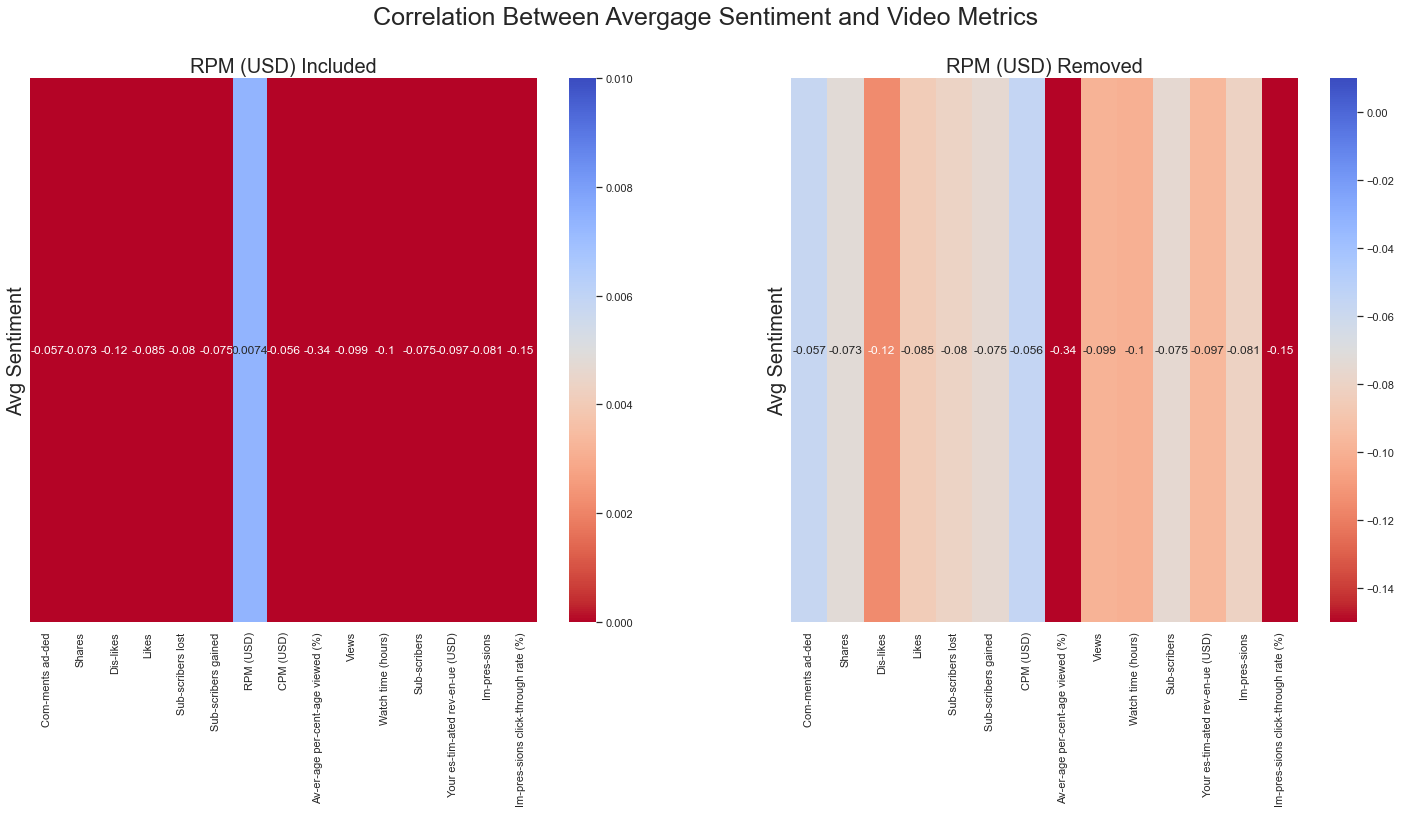

In [1332]:
fig, ax = plt.subplots(ncols=2, figsize=(25,10))
fig.suptitle('Correlation Between Avergage Sentiment and Video Metrics', size=25)

plot17 = sns.heatmap(metrics_by_video.corr().loc[['avg_polarity'],:].drop('avg_polarity', axis=1), annot=True, annot_kws={"fontsize":12}, cmap='coolwarm_r', vmin=0, vmax=.01, ax=ax[0], yticklabels=False)

plot17.set_ylabel('Avg Sentiment', size=20)
plot17.set_title('RPM (USD) Included', size=20)
plot17.invert_yaxis()

plot18 = sns.heatmap(metrics_by_video.corr().loc[['avg_polarity'],:].drop(['avg_polarity','RPM (USD)'], axis=1), annot=True, annot_kws={"fontsize":12}, cmap='coolwarm_r', vmin=-.15, vmax=.01, ax=ax[1], yticklabels=False)

plot18.set_ylabel('Avg Sentiment', size=20)
plot18.set_title('RPM (USD) Removed', size=20)


### 3.2 - Analyzing The Best/Worst Videos

##### 3.2.1 - What Are the 10 Best Performing Videos?

Plot 19-20

In [ ]:
#create dataframe of only top 10 videos
top10_videos = metrics_by_video.sort_values(by=['Shares', 'Likes', 'Sub­scribers gained', 'Views', 'Your es­tim­ated rev­en­ue (USD)'], ascending=False).head(10)

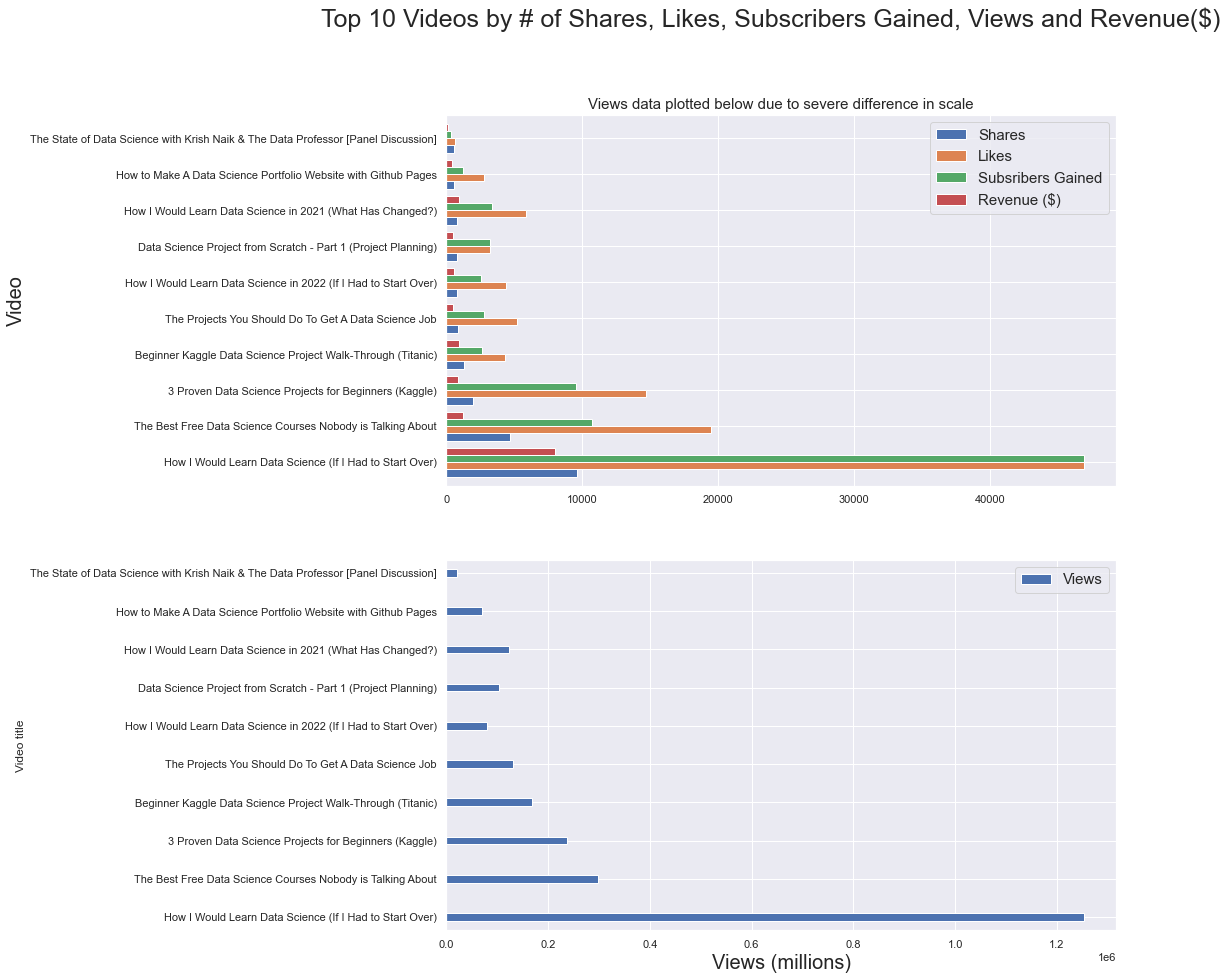

In [1320]:
fig, ax = plt.subplots(nrows=2, figsize=(12,15))
fig.suptitle('Top 10 Videos by # of Shares, Likes, Subscribers Gained, Views and Revenue($)', size=25)

plot19 = top10_videos.plot(x='Video title', y=['Shares', 'Likes', 'Sub­scribers gained','Your es­tim­ated rev­en­ue (USD)'], kind='barh', ax=ax[0], width=.8)

plot19.set_xlabel('', size=20)
plot19.set_ylabel('Video', size=20)
plot19.set_title('Views data plotted below due to severe difference in scale', size=15)
plot19.legend(labels=['Shares', 'Likes', 'Subsribers Gained', 'Revenue ($)'], fontsize=15)

plot20 = top10_videos.plot(x='Video title', y='Views_x', kind='barh', ax=ax[1], width=.2)

plot20.set_xlabel('Views (millions)', size=20)
plot20.legend(labels=['Views'], fontsize=15)



##### 3.2.2 -  What are the 10 Worst Performing Videos?

In [ ]:
bottom10_videos = metrics_by_video.sort_values(by=['Shares', 'Likes', 'Sub­scribers gained', 'Views', 'Your es­tim­ated rev­en­ue (USD)']).head(10)

In [ ]:
bottom10_videos = bottom10_videos.merge(metrics_by_country, on='Video_Id', how='left').drop(labels=['Video Title','Thumbnail link', 'Country Code', 'Is Subscribed',
       'Views_y', 'Video Likes Added', 'Video Dislikes Added', 'Video Likes Removed', 'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'], axis=1).drop_duplicates(subset=['Video_Id'])

Plot 21-22

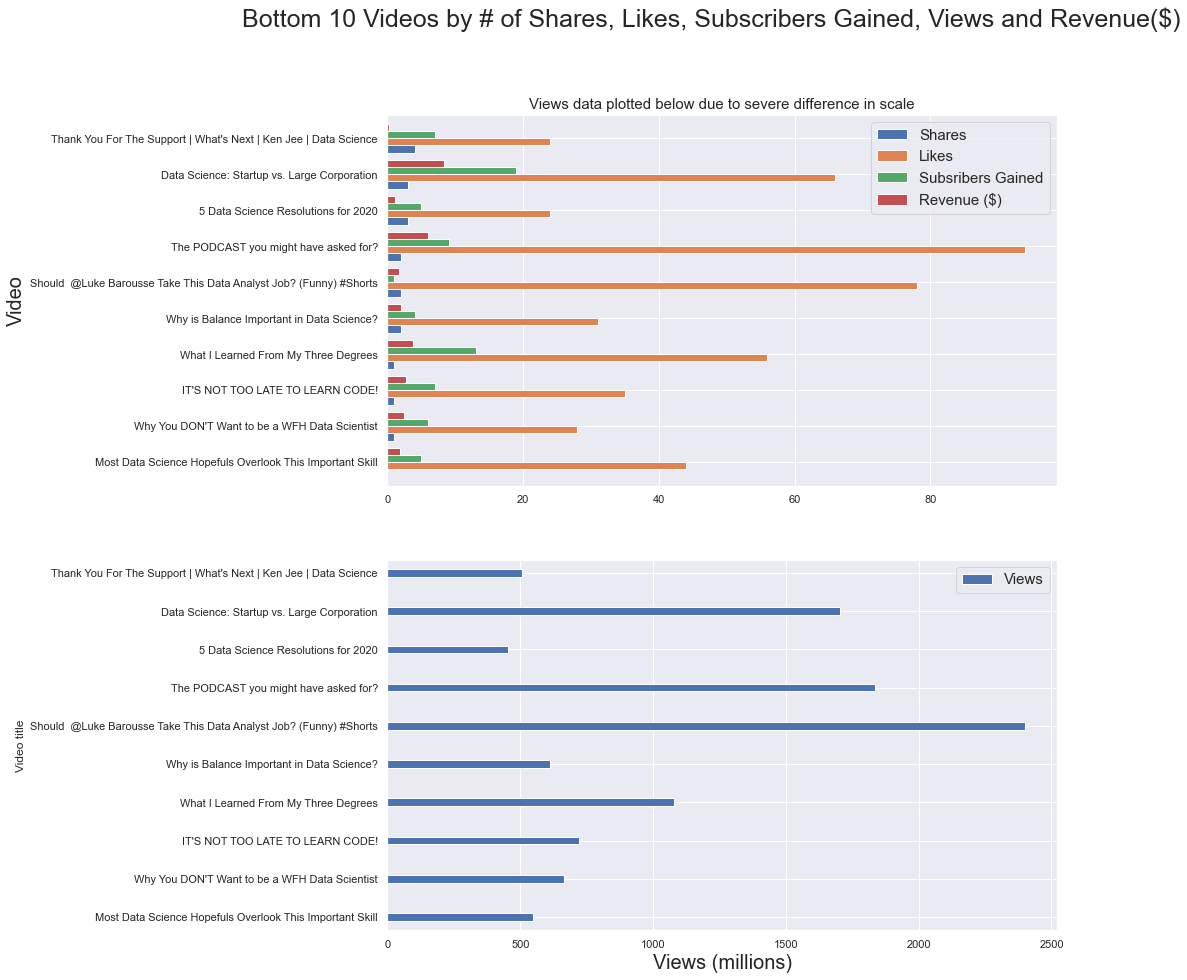

In [1321]:
fig, ax = plt.subplots(nrows=2, figsize=(12,15))
fig.suptitle('Bottom 10 Videos by # of Shares, Likes, Subscribers Gained, Views and Revenue($)', size=25)

plot21 = bottom10_videos.plot(x='Video title', y=['Shares', 'Likes', 'Sub­scribers gained','Your es­tim­ated rev­en­ue (USD)'], kind='barh', ax=ax[0], width=.8)

plot21.set_xlabel('', size=20)
plot21.set_ylabel('Video', size=20)
plot21.set_title('Views data plotted below due to severe difference in scale', size=15)
plot21.legend(labels=['Shares', 'Likes', 'Subsribers Gained', 'Revenue ($)'], fontsize=15)

plot22 = bottom10_videos.plot(x='Video title', y='Views_x', kind='barh', ax=ax[1], width=.2)

plot22.set_xlabel('Views (millions)', size=20)
plot22.legend(labels=['Views'], fontsize=15)

##### 3.2.3 -  Analyzing the Top/Bottom 10 Videos

In [ ]:
#merge top10_videos with metrics_by_country to get video duration, drop uneeded columns
top10_videos = top10_videos.merge(metrics_by_country, on='Video_Id', how='left').drop(labels=['Video Title','Thumbnail link', 'Country Code', 'Is Subscribed',
       'Views_y', 'Video Likes Added', 'Video Dislikes Added', 'Video Likes Removed', 'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'], axis=1).drop_duplicates(subset=['Video_Id'])

Plot 23

Text(0.5, 1.0, 'Purple = Avg of Bottom 10 Videos         Orange = Avg of Top 10 Videos         Red = Avg of All 221 Videos')

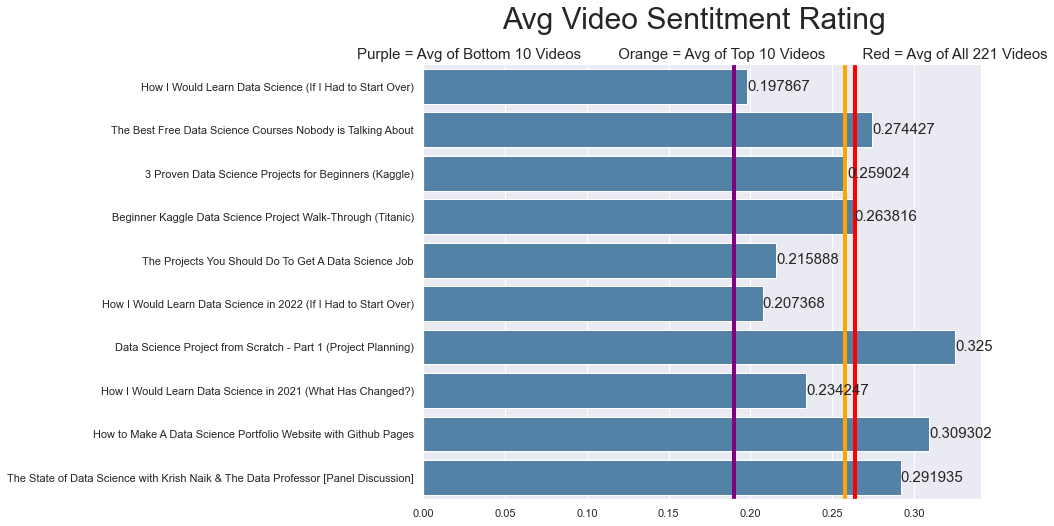

In [1331]:
#plot comment sentiment compared to average
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Avg Video Sentitment Rating', size=30)

plot23 = sns.barplot(data=top10_videos, x='avg_polarity', y='Video title', order=top10_videos['Video title'], color='steelblue')

plot23.axvline(0.2637, linewidth=4, color='red')
plot23.axvline(0.2578, linewidth=4, color='orange')
plot23.axvline(0.1897, linewidth=4, color='purple')
plot23.bar_label(plot23.containers[0], fontsize=15)
plot23.set_ylabel('',size=20) 
plot23.set_xlabel('', size=20)
plot23.set_title('Purple = Avg of Bottom 10 Videos         Orange = Avg of Top 10 Videos         Red = Avg of All 221 Videos', size=15)


Plot 24

Text(0.5, 1.0, 'Purple = Avg of Bottom 10 Videos        Red = Avg of All 221 Videos         Orange = Avg of Top 10 Videos')

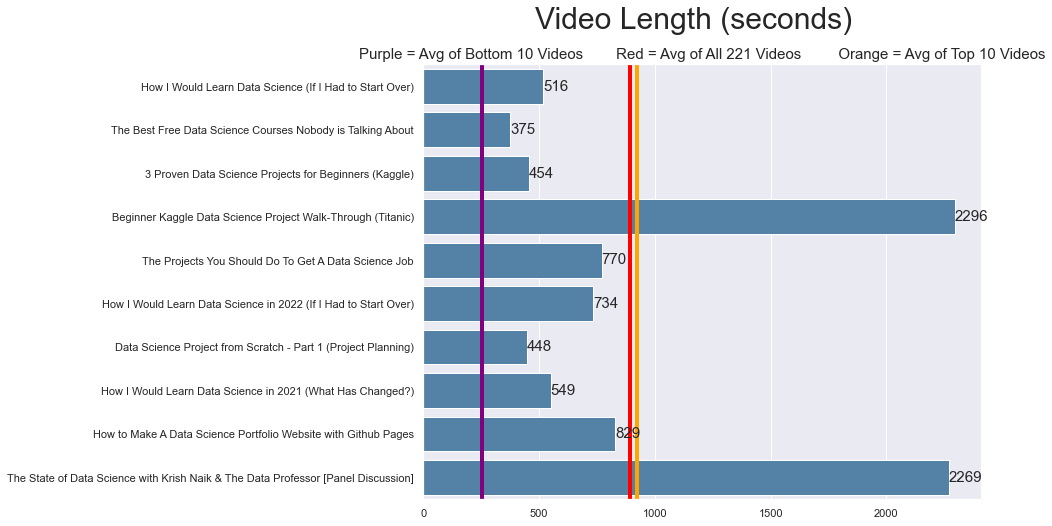

In [1335]:
#plot length of videos compared to average
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Video Length (seconds)\n', size=30)

plot24 = sns.barplot(data=top10_videos, x='Video Length', y='Video title', order=top10_videos['Video title'], color='steelblue')

plot24.axvline(892.65, linewidth=4, color='red')
plot24.axvline(924, linewidth=4, color='orange')
plot24.axvline(254.6, linewidth=4, color='purple')
plot24.bar_label(plot24.containers[0], fontsize=15)
plot24.set_ylabel('', size=20)
plot24.set_xlabel('', size=20)
plot24.set_title('Purple = Avg of Bottom 10 Videos        Red = Avg of All 221 Videos         Orange = Avg of Top 10 Videos', size=15)


Plot 25-27

Text(0.5, 1.0, 'Top 10 Videos')

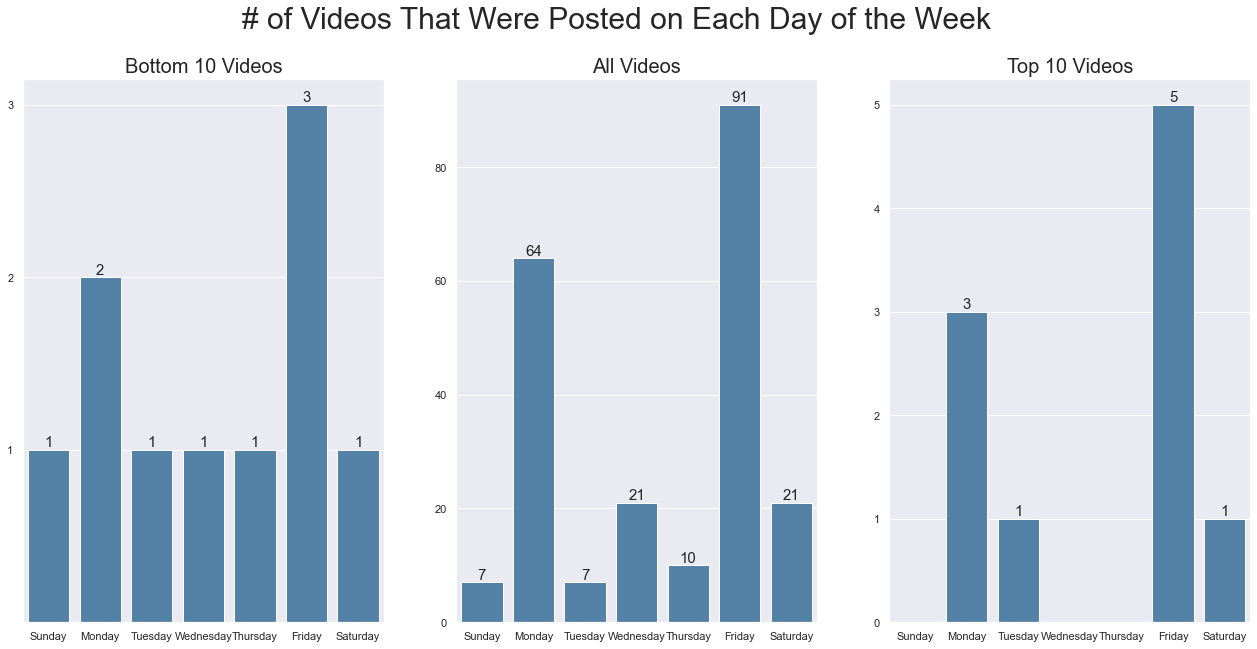

In [1339]:
#plot day of the week when videos are posted compared to all videos
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(22,10))

palette = {'Sunday':'darkgreen',
           'Monday':'forestgreen',
           'Tuesday':'mediumseagreen',
           'Wednesday':'g',
           'Thursday':'limegreen',
           'Friday':'g', 
           'Saturday': 'greenyellow'}

order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig.suptitle('# of Videos That Were Posted on Each Day of the Week', size=30)

plot25 = sns.countplot(data=bottom10_videos, x='Video publish day', ax=ax[0], color='steelblue', order=order)

plot25.bar_label(plot1.containers[0], fontsize=15)
plot25.set(xlabel=None, ylabel=None)
plot25.set_title('Bottom 10 Videos', size=20)
plot25.set_yticks(np.arange(1,4,1))

plot26 = sns.countplot(data=metrics_by_video, x='Video publish day', ax=ax[1], color='steelblue', order=order)

plot26.bar_label(plot2.containers[0], fontsize=15)
plot26.set(xlabel=None, ylabel=None)
plot26.set_title('All Videos', size=20)

plot27 = sns.countplot(data=metrics_by_video, x=top10_videos['Video publish day'], ax=ax[2], color='steelblue', order=order)

plot27.bar_label(plot3.containers[0], fontsize=15)
plot27.set(xlabel=None, ylabel=None)
plot27.set_title('Top 10 Videos', size=20)

In [ ]:
#convert average view duration to an integer
def time_to_num(time_str):
    hh, mm , ss = map(int, time_str.split(':'))
    return ss + 60*(mm + 60*hh)
    
top10_videos['Av­er­age view dur­a­tion'] =  top10_videos['Av­er­age view dur­a­tion'].apply(lambda x: time_to_num(x))


Plot 28

C:\Users\jorda\AppData\Local\Temp/ipykernel_11508/4294436372.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plot.axvline(183.4,Linewidth=4, color='orange')
C:\Users\jorda\AppData\Local\Temp/ipykernel_11508/4294436372.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plot.axvline(118.3,Linewidth=4, color='purple')


Text(0.5, 1.0, 'Purple = Avg of Bottom 10 Videos        Orange Line = Avg of Top 10 Videos          Red Line = Avg of All 221 Videos')

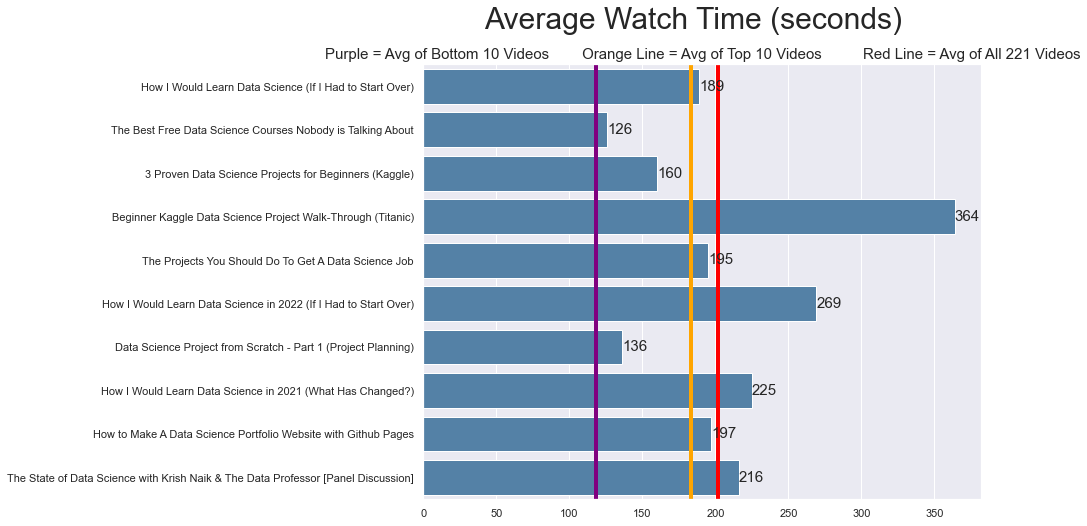

In [1342]:
#plot average view duration compared to average
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Average Watch Time (seconds)', size=30)

plot28 = sns.barplot(data=top10_videos, x='Av­er­age view dur­a­tion', y='Video title', color='steelblue')

plot28.axvline(202, linewidth=4, color='red')
plot28.axvline(183.4,Linewidth=4, color='orange')
plot28.axvline(118.3,Linewidth=4, color='purple')
plot28.bar_label(plot28.containers[0], fontsize=15)
plot28.set_xlabel('')
plot28.set_ylabel('')
plot28.set_title('Purple = Avg of Bottom 10 Videos        Orange Line = Avg of Top 10 Videos          Red Line = Avg of All 221 Videos', size=15)
